dict_keys(['LE_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_la

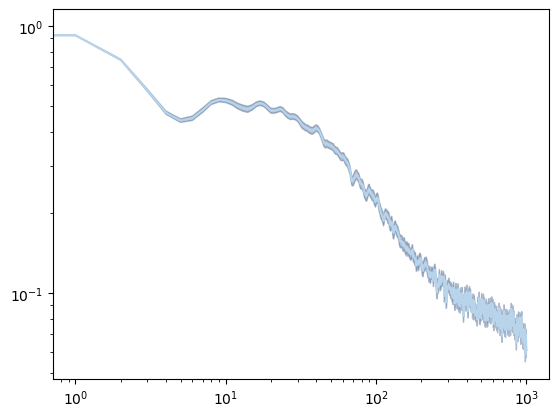

In [18]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'LE_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(len(array99)), array99, label='array99', color=colors[0])
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])


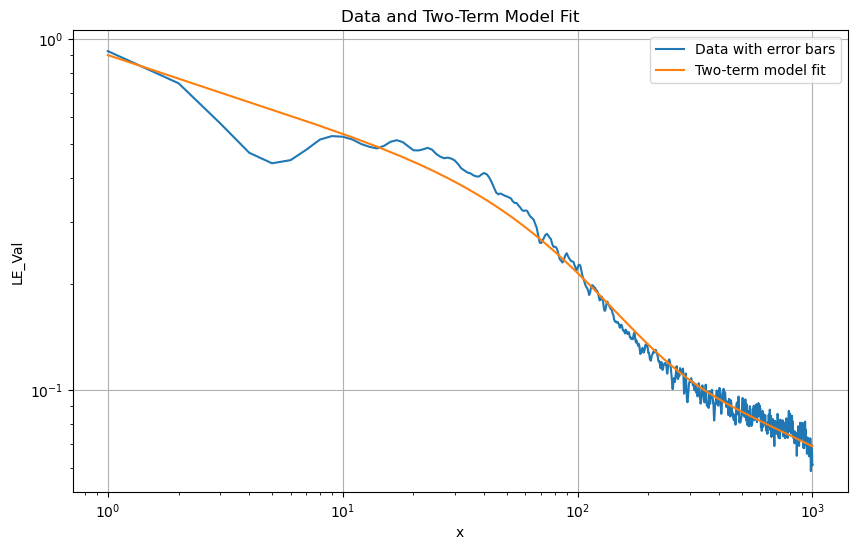

Fitted parameters:
  t = 75.311370 ± 0.796796
  n = 0.265111 ± 0.003235
  a = 0.321521 ± 0.001038
  b = 0.636768 ± 0.003983


In [19]:
import numpy as np
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6))
# load and flatten
x = np.arange(len(array99))
y = array99
y_err = standard_error99  # Optional, if you have error data

# drop x ≤ 0
mask = x > 0
x, y, y_err = x[mask], y[mask], y_err[mask]

# floor any zero errors
eps = np.median(y_err[y_err>0]) * 1e-3
y_err = np.where(y_err>0, y_err, eps)

# model definition
def two_term_model(x, t, n, a, b):
    return n*np.exp(-x/t) + b*x**(-a)

# initial guess and bounds
p0 = [76.0, 1.2, 0.396, 0.4]
bounds = ([1e-8, 0.0, 0.0, 0.0], [np.inf, np.inf, np.inf, np.inf])

# now call curve_fit
popt, pcov = curve_fit(
    two_term_model, x, y,
    p0=p0, bounds=bounds,
    sigma=y_err, absolute_sigma=True
)

# Generate smooth curve for the fitted model
x_fit = np.linspace(np.min(x), np.max(x), 300)
y_fit = two_term_model(x_fit, *popt)

# Plot data with error bars and fitted curve
plt.loglog(x, y, label='Data with error bars')
plt.loglog(x_fit, y_fit, label='Two-term model fit')
plt.xlabel('x')
plt.ylabel('LE_Val')
plt.title('Data and Two-Term Model Fit')
plt.legend()
plt.grid(True)
plt.show()
t_fit, n_fit, a_fit, b_fit = popt
t_err, n_err, a_err, b_err= np.sqrt(np.diag(pcov))
print(f"Fitted parameters:")
print(f"  t = {t_fit:.6f} ± {t_err:.6f}")
print(f"  n = {n_fit:.6f} ± {n_err:.6f}")
print(f"  a = {a_fit:.6f} ± {a_err:.6f}")
print(f"  b = {b_fit:.6f} ± {b_err:.6f}")

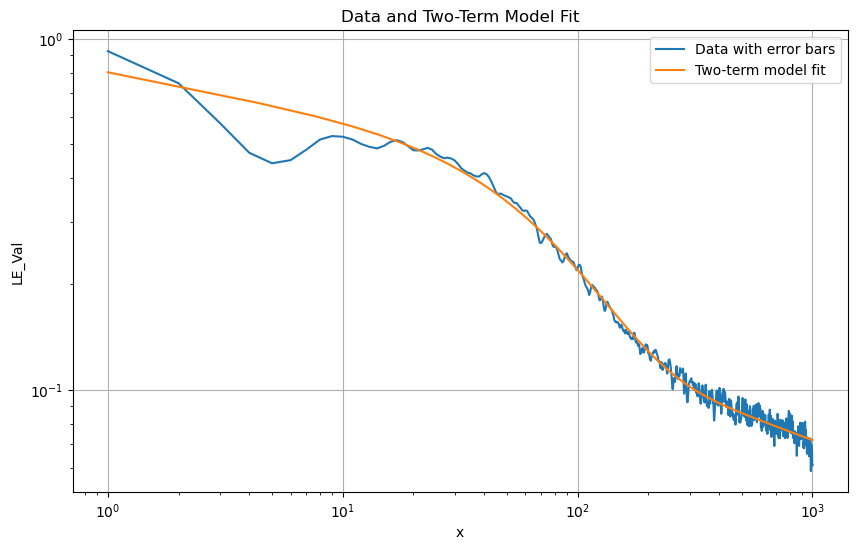

Fitted parameters:
  t = 67.818166 ± 0.719954
  n = 0.398168 ± 0.004875
  a = 0.252039 ± 0.005554
  b = 0.410101 ± 0.014687


In [20]:
import numpy as np
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6))
# load and flatten
x = np.arange(len(array99))
y = array99
y_err = standard_error99  # Optional, if you have error data
x_fit = x[10:]
y_fit = y[10:]
y_err_fit = y_err[10:]  # Optional, if you have error data  
# drop x ≤ 0
mask = x > 0
x, y, y_err = x[mask], y[mask], y_err[mask]

# floor any zero errors
eps = np.median(y_err[y_err>0]) * 1e-3
y_err = np.where(y_err>0, y_err, eps)

# model definition
def two_term_model(x, t, n, a, b):
    return n*np.exp(-x/t) + b*x**(-a)

# initial guess and bounds
p0 = [76.0, 1.2, 0.396, 0.4]
bounds = ([1e-8, 0.0, 0.0, 0.0], [np.inf, np.inf, np.inf, np.inf])

# now call curve_fit
popt, pcov = curve_fit(
    two_term_model, x_fit, y_fit,
    p0=p0, bounds=bounds,
    sigma=y_err_fit, absolute_sigma=True
)

# Generate smooth curve for the fitted model
x_fit = np.linspace(np.min(x), np.max(x), 300)
y_fit = two_term_model(x_fit, *popt)

# Plot data with error bars and fitted curve
plt.loglog(x, y, label='Data with error bars')
plt.loglog(x_fit, y_fit, label='Two-term model fit')
plt.xlabel('x')
plt.ylabel('LE_Val')
plt.title('Data and Two-Term Model Fit')
plt.legend()
plt.grid(True)
plt.show()
t_fit, n_fit, a_fit, b_fit = popt
t_err, n_err, a_err, b_err= np.sqrt(np.diag(pcov))
print(f"Fitted parameters:")
print(f"  t = {t_fit:.6f} ± {t_err:.6f}")
print(f"  n = {n_fit:.6f} ± {n_err:.6f}")
print(f"  a = {a_fit:.6f} ± {a_err:.6f}")
print(f"  b = {b_fit:.6f} ± {b_err:.6f}")

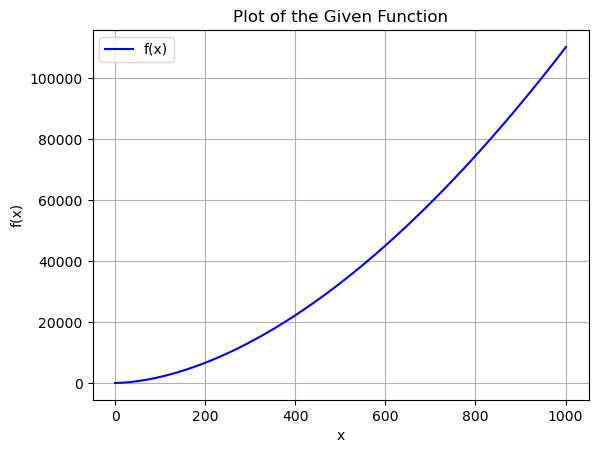

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define parameters (you can adjust these)

K, N, A, B = popt

a = 1/K
b = A
c = N
d = B
k = 1.0

# Define the function
def f(x):
    x = np.array(x)

    #term1 = k * x**2 * c

    #term2 = (k * x**3)/3

    term3 = (6*d*k*x**(2-b))/(6-9*b + 3*b**2)

    #term4 = (2*c*k*(1 - np.exp(-a*x)-a*x*math.log10(math.e)))/(a**2*(math.log10(math.e))**2)

    return  term3 #term1 + term3 + term4 +term2

# 

x_vals = np.linspace(0, 1001, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.title('Plot of the Given Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_46785/2054932189.py:2: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.linspace(0, 1001, 1000))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_46785/2054932189.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val = np.log(LE_Val)


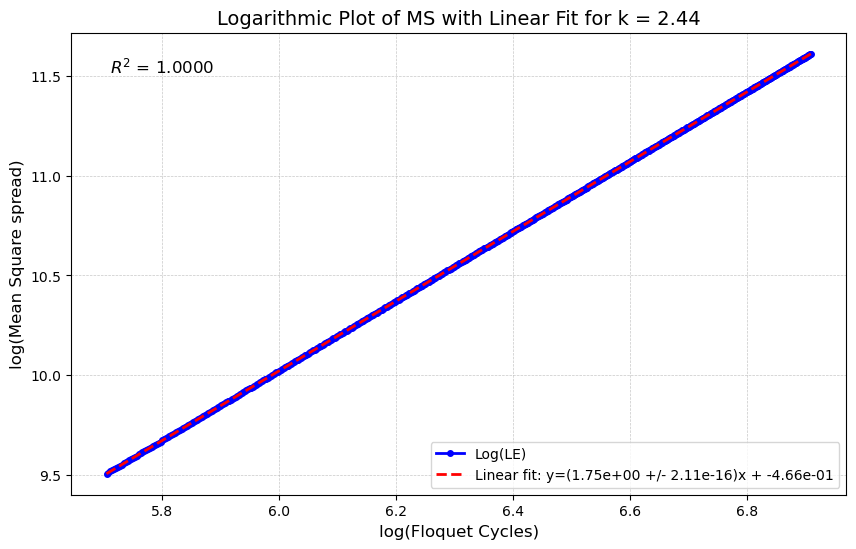

R^2 value of the linear fit: 1.0000
Linear fit parameters (0-150): slope = 1.75e+00, intercept = -4.66e-01


In [24]:
x = np.linspace(0, 1001, 1000)
x_log = np.log(np.linspace(0, 1001, 1000))
LE_Val = f(x)
LE_Val = np.log(LE_Val)
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val[300:]
#LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
poptnew, pcovnew = curve_fit(linear_f, x_log_plot, LE_Val_plot)
slope_150, intercept_150 = poptnew
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcovnew[0, 0])
intercept_150_error = np.sqrt(pcovnew[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


dict_keys(['RMS_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_l

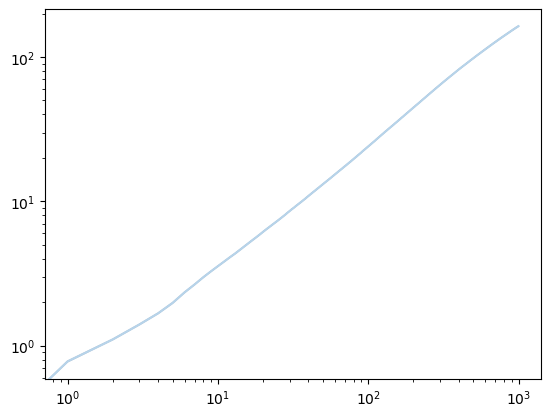

In [25]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(len(array99)), array99, label='array99', color=colors[0])
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])


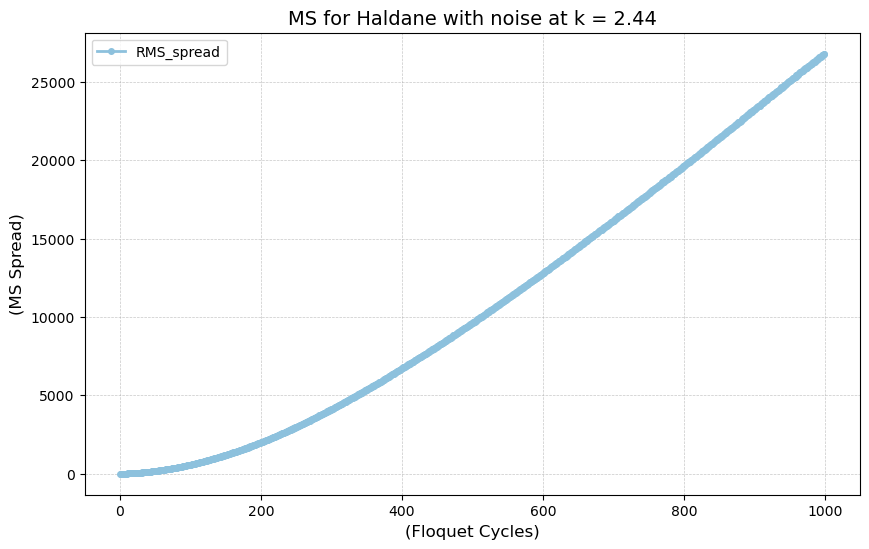

In [26]:
plt.figure(figsize=(10, 6))
array99 = array99**2  # Square the array for RMS
# Plot the curve with enhanced styling
plt.plot(np.arange(len(array99)), array99, label="RMS_spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('MS for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('(Floquet Cycles)', fontsize=12)
plt.ylabel('(MS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_46785/4192099663.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_46785/4192099663.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


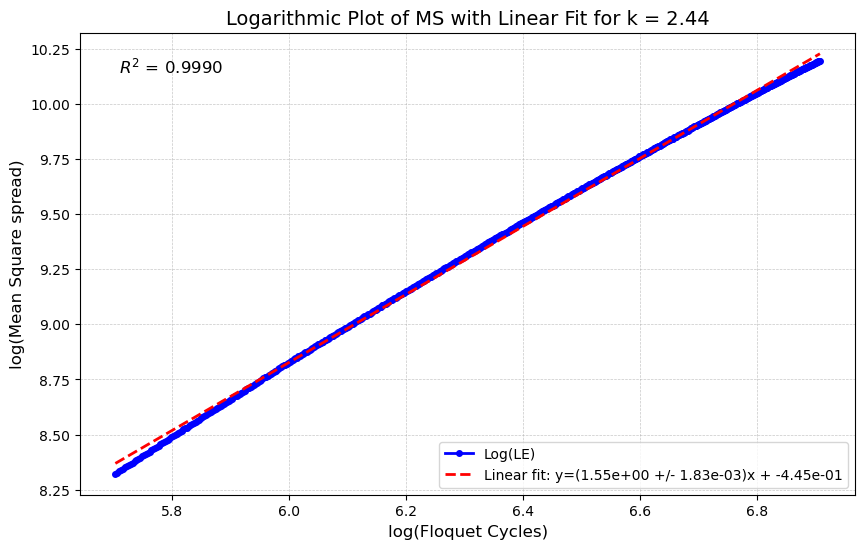

R^2 value of the linear fit: 0.9990
Linear fit parameters (0-150): slope = 1.55e+00, intercept = -4.45e-01


In [27]:
LE_Val = array99
LE_Error = standard_error99
LE_Val = array99
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
